In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Cargar los datos
df_train = pd.read_csv("train.csv")

# Crear la variable categórica a partir de SalePrice
q1 = df_train['SalePrice'].quantile(0.25)
q3 = df_train['SalePrice'].quantile(0.75)
df_train['PriceCategory'] = pd.cut(df_train['SalePrice'], bins=[-np.inf, q1, q3, np.inf], labels=['Económicas', 'Intermedias', 'Caras'])

# Definir X e y
X = df_train.select_dtypes(include=np.number).drop(['SalePrice'], axis=1)
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = df_train['PriceCategory'].loc[X.index]

# Codificar la variable de salida
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)




In [2]:
#Modelo 1
model1 = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
model1.fit(X_train, y_train)

print("🔹 Modelo 1 (ReLU + Adam):")
print(classification_report(y_test, model1.predict(X_test), target_names=encoder.classes_))


🔹 Modelo 1 (ReLU + Adam):
              precision    recall  f1-score   support

       Caras       0.90      0.83      0.86        88
  Económicas       0.80      0.81      0.80        81
 Intermedias       0.83      0.85      0.84       168

    accuracy                           0.84       337
   macro avg       0.84      0.83      0.84       337
weighted avg       0.84      0.84      0.84       337



In [4]:
#Modelo 2
model2 = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='tanh', solver='sgd', learning_rate_init=0.01, max_iter=500, random_state=42)
model2.fit(X_train, y_train)

print("🔸 Modelo 2 (tanh + SGD):")
print(classification_report(y_test, model2.predict(X_test), target_names=encoder.classes_))


🔸 Modelo 2 (tanh + SGD):
              precision    recall  f1-score   support

       Caras       0.91      0.85      0.88        88
  Económicas       0.78      0.80      0.79        81
 Intermedias       0.83      0.85      0.84       168

    accuracy                           0.84       337
   macro avg       0.84      0.84      0.84       337
weighted avg       0.84      0.84      0.84       337



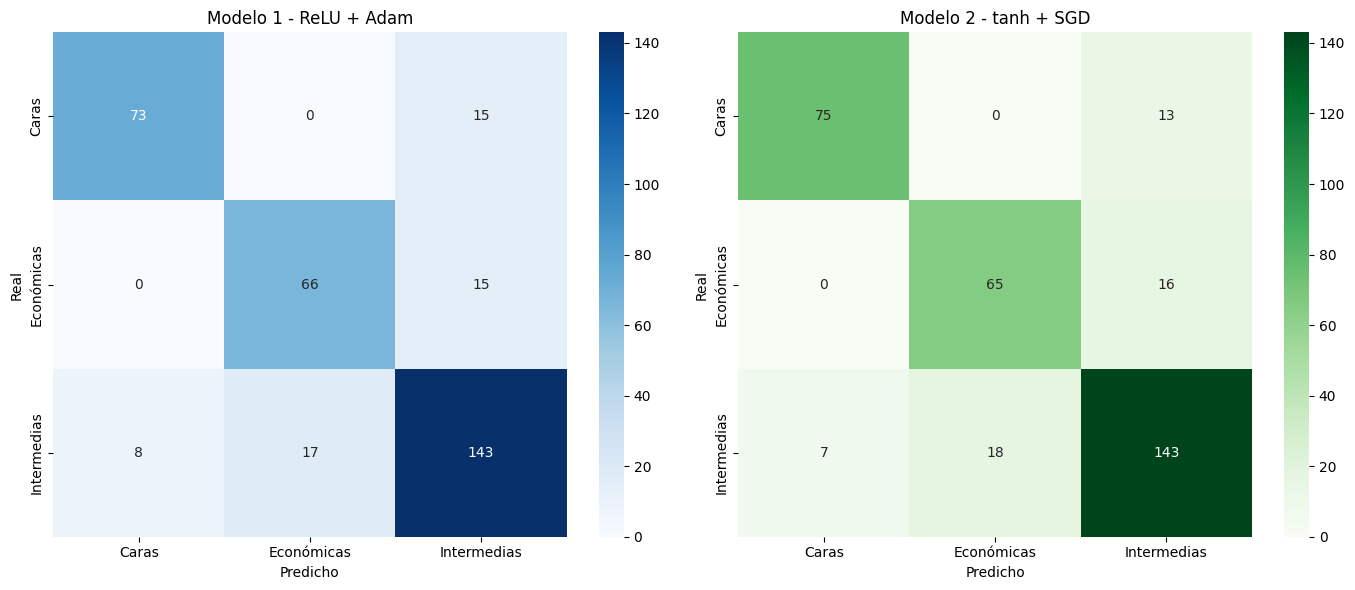

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir etiquetas
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

# Obtener etiquetas originales
labels = encoder.classes_

# Matrices de confusión
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)

# Graficar ambas matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Modelo 1 - ReLU + Adam")
axes[0].set_xlabel("Predicho")
axes[0].set_ylabel("Real")

sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Modelo 2 - tanh + SGD")
axes[1].set_xlabel("Predicho")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


In [6]:
# INCISO 6: COMPARACIÓN DE LOS MODELOS DE CLASIFICACIÓN. (REDES NEURONALES)
import time
from sklearn.metrics import accuracy_score

# Medir tiempo de entrenamiento y evaluación para Modelo 1
start1 = time.time()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
end1 = time.time()
time1 = end1 - start1

# Medir tiempo de entrenamiento y evaluación para Modelo 2
start2 = time.time()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
end2 = time.time()
time2 = end2 - start2

# Accuracy y métricas
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)

print(f"🔹 Modelo 1 (ReLU + Adam)")
print(f"   Accuracy: {acc1:.4f}")
print(f"   Tiempo de procesamiento: {time1:.2f} segundos")
print(classification_report(y_test, y_pred1, target_names=encoder.classes_))

print(f"\n🔸 Modelo 2 (tanh + SGD)")
print(f"   Accuracy: {acc2:.4f}")
print(f"   Tiempo de procesamiento: {time2:.2f} segundos")
print(classification_report(y_test, y_pred2, target_names=encoder.classes_))


🔹 Modelo 1 (ReLU + Adam)
   Accuracy: 0.8368
   Tiempo de procesamiento: 1.21 segundos
              precision    recall  f1-score   support

       Caras       0.90      0.83      0.86        88
  Económicas       0.80      0.81      0.80        81
 Intermedias       0.83      0.85      0.84       168

    accuracy                           0.84       337
   macro avg       0.84      0.83      0.84       337
weighted avg       0.84      0.84      0.84       337


🔸 Modelo 2 (tanh + SGD)
   Accuracy: 0.8398
   Tiempo de procesamiento: 3.64 segundos
              precision    recall  f1-score   support

       Caras       0.91      0.85      0.88        88
  Económicas       0.78      0.80      0.79        81
 Intermedias       0.83      0.85      0.84       168

    accuracy                           0.84       337
   macro avg       0.84      0.84      0.84       337
weighted avg       0.84      0.84      0.84       337



In [7]:
# ANALISIS DE SOBRE AJUSTE:
train_acc1 = accuracy_score(y_train, model1.predict(X_train))
test_acc1 = accuracy_score(y_test, y_pred1)

train_acc2 = accuracy_score(y_train, model2.predict(X_train))
test_acc2 = accuracy_score(y_test, y_pred2)

print("🔍 Sobreajuste - Modelo 1:")
print(f"   Entrenamiento: {train_acc1:.4f}")
print(f"   Prueba: {test_acc1:.4f}")

print("🔍 Sobreajuste - Modelo 2:")
print(f"   Entrenamiento: {train_acc2:.4f}")
print(f"   Prueba: {test_acc2:.4f}")

🔍 Sobreajuste - Modelo 1:
   Entrenamiento: 1.0000
   Prueba: 0.8368
🔍 Sobreajuste - Modelo 2:
   Entrenamiento: 1.0000
   Prueba: 0.8398


In [8]:
# TUNEAR HYPERPARAMETROS PARA EL MEJOR MODELO
# optimmizar el MLP classifier 
from sklearn.model_selection import GridSearchCV

# Definir nuevo clasificador
mlp = MLPClassifier(max_iter=500, random_state=42)

# Definir la grilla de búsqueda
param_grid = {
    'hidden_layer_sizes': [(64, 32), (128,), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01]
}

grid = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("🔧 Mejor combinación de parámetros:")
print(grid.best_params_)

# Evaluar el mejor modelo
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\n📈 Resultados del mejor modelo optimizado:")
print(classification_report(y_test, y_pred_best, target_names=encoder.classes_))

🔧 Mejor combinación de parámetros:
{'activation': 'tanh', 'hidden_layer_sizes': (128,), 'learning_rate_init': 0.01, 'solver': 'sgd'}

📈 Resultados del mejor modelo optimizado:
              precision    recall  f1-score   support

       Caras       0.91      0.89      0.90        88
  Económicas       0.81      0.88      0.84        81
 Intermedias       0.88      0.85      0.86       168

    accuracy                           0.87       337
   macro avg       0.86      0.87      0.87       337
weighted avg       0.87      0.87      0.87       337



c:\Users\Oscar Escriba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
# SELECCIONAR SALEPRICE COMO VARIABLE RESPUESTA
# Reutilizar X (ya está limpio)
y_reg = df_train['SalePrice'].loc[X.index]

# Separar en train y test
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y_reg, test_size=0.3, random_state=42)

In [ ]:
# DOS MODELOS DE REGRESION CON REDES NEURONALES
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Modelo 1
reg1 = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
reg1.fit(X_train_r, y_train_r)
pred1 = reg1.predict(X_test_r)

# Modelo 2
reg2 = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='tanh', solver='sgd', learning_rate_init=0.01, max_iter=1000, random_state=42)
reg2.fit(X_train_r, y_train_r)
pred2 = reg2.predict(X_test_r)

# Evaluación
def eval_model(y_true, y_pred, name):
    print(f"📊 {name}")
    print(f"   MAE : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"   RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"   R²  : {r2_score(y_true, y_pred):.4f}\n")

eval_model(y_test_r, pred1, "Modelo 1 (ReLU + Adam)")
eval_model(y_test_r, pred2, "Modelo 2 (tanh + SGD)")


c:\Users\Oscar Escriba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


📊 Modelo 1 (ReLU + Adam)
   MAE : 47879.01


TypeError: got an unexpected keyword argument 'squared'